import packages and self written classes and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from neural_network import *
from optimizers import *
from mnist_functions import *
import sys

import warnings
warnings.filterwarnings("ignore")

Load and preprocess data

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Extract data (features) and target (labels)
X = mnist.data
y = mnist.target

#one hot encoding
encoder = OneHotEncoder(sparse_output=False)

# 4. Fit and transform the labels
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
# Scaling
X = X/255.0

output_size = 10
# train test split

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y_onehot, test_size=10000, random_state=42
)

# Split train+val into train (50k) and validation (10k)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=10000, random_state=42
)

Tune learning rate and regularization parameter simultaneously

On the x axis are the different regularization parameters and on the y axis are different learning rates


time
           0.000100   0.001778   0.031623   0.562341   10.000000
0.000100    1.123473   1.075416   1.104280   1.054973   1.034661
0.001778    1.027396   1.022326   1.016121   0.990619   1.008151
0.031623    1.003861   1.050535   1.024548   0.987612   0.981146
0.562341    1.140198   1.197918   1.055994   0.981055   1.010742
10.000000   0.897030   0.830330   0.851176   1.108910   0.985161
result
           0.000100   0.001778   0.031623   0.562341   10.000000
0.000100      0.0953     0.1002     0.0650     0.1207     0.1338
0.001778      0.5756     0.6226     0.5775     0.4918     0.1689
0.031623      0.8043     0.8453     0.8534     0.9086     0.4383
0.562341      0.1070     0.1070     0.1158     0.0966     0.1070
10.000000     0.0997     0.0997     0.0997     0.0966     0.1070


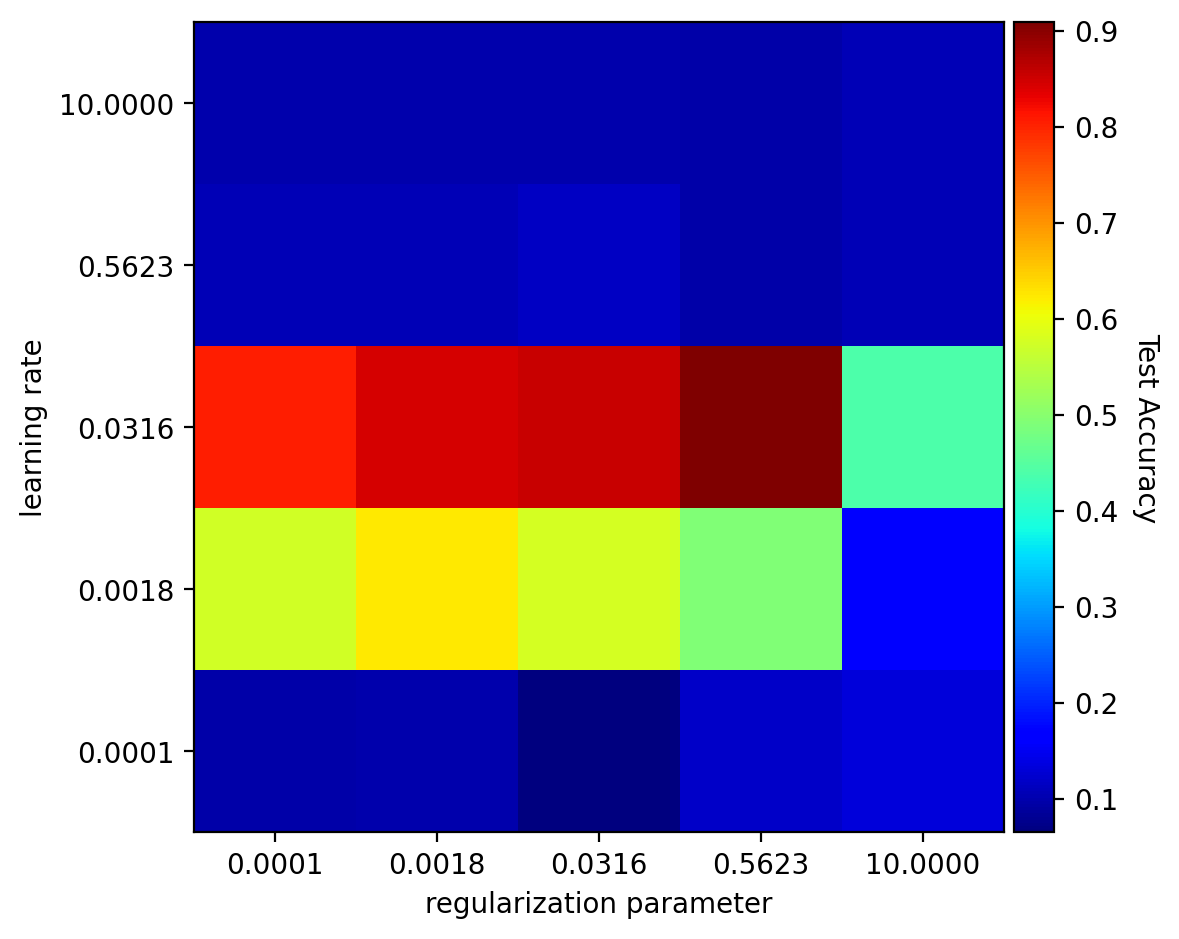

,0.000100,0.001778,0.031623,0.562341,10.000000
0.000100,0.0953,0.1002,0.0650,0.1207,0.1338
0.001778,0.5756,0.6226,0.5775,0.4918,0.1689
0.031623,0.8043,0.8453,0.8534,0.9086,0.4383
0.562341,0.1070,0.1070,0.1158,0.0966,0.1070
10.000000,0.0997,0.0997,0.0997,0.0966,0.1070


In [ ]:
np.random.seed(472)
layer_output_sizes = [128, 64, 32, output_size]
activation_funcs = [ReLU, sigmoid, sigmoid, softmax]
list_lambda = np.logspace(-4,1,5)
list_learning_rates = np.logspace(-4,1,5) 
epochs = 100 #Lars 100
tune_learning_rate_reg(X_train, y_train, X_val, y_val, layer_output_sizes, activation_funcs, list_learning_rates, list_lambda, epochs=epochs)

Compare different activation functions

On the x axis are different regularization parameters and on the y axis the different models

model 1: ReLU, sigmoid, sigmoid

model 2: ReLU, sigmoid, ReLU

model 3: sigmoid, sigmoid, sigmoid


In [ ]:
np.random.seed(209)
layer_output_sizes = [128, 64, 32, output_size]
list_activation_funcs = [[ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, ReLU, softmax], [sigmoid, sigmoid, sigmoid, softmax]]
list_model_numbers = [1,2,3]
list_regularization = np.logspace(-4,1,5)
epochs = 100 #Lars 100
compare_activation_reg(X_train, y_train, X_val, y_val, layer_output_sizes, list_activation_funcs, list_model_numbers, list_regularization, epochs)

--------------------------------------------------
times:
   0.000100   0.001778   0.031623   0.562341   10.000000
1   0.889621   0.912517   0.854963   0.858579   0.865489
2   0.871492   0.890110   0.889123   0.899529   0.843314
3   0.901404   1.022322   0.954609   0.938640   0.960452
accuraccy
   0.000100   0.001778   0.031623   0.562341   10.000000
1     0.8515     0.8276     0.8419     0.9132     0.3890
2     0.7420     0.3925     0.7074     0.7410     0.7701
3     0.9041     0.9106     0.9259     0.9026     0.0988
--------------------------------------------------
accuraccy of best learning rate
1    0.9132
2    0.7701
3    0.9259
dtype: float64


,0.000100,0.001778,0.031623,0.562341,10.000000
1,0.8515,0.8276,0.8419,0.9132,0.3890
2,0.7420,0.3925,0.7074,0.7410,0.7701
3,0.9041,0.9106,0.9259,0.9026,0.0988


Plot errors per epoch

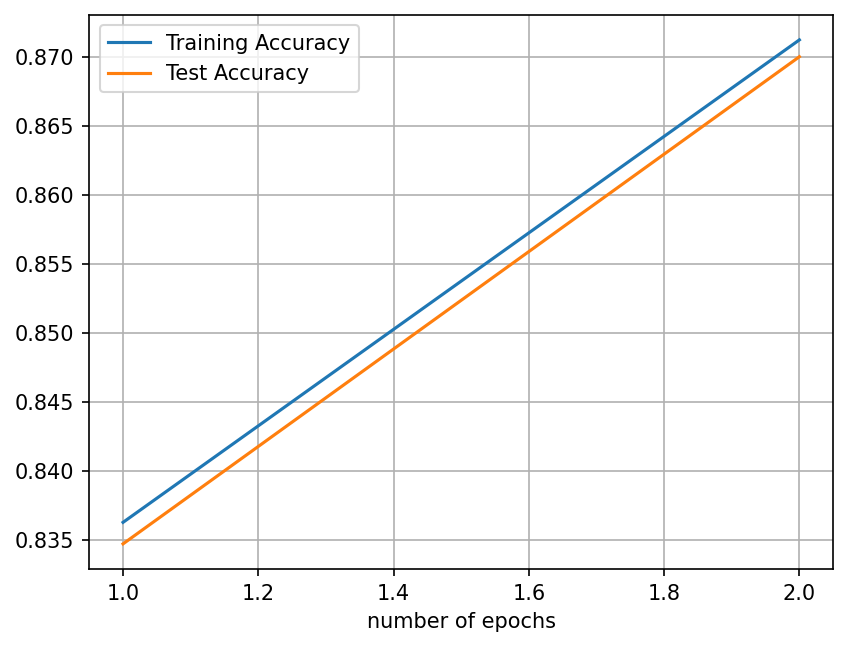

In [ ]:
np.random.seed(120)
layer_output_sizes = [128, 64, output_size]
activation_funcs = [ReLU, sigmoid, softmax]
lmbda = 0
epochs= 200 #Lars 200
compute_errors_per_epoch(X_train, y_train, X_val, y_val, layer_output_sizes, activation_funcs, lmbda, epochs)

Compare the number of hidden layers while using regularization

On the x axis are different regularization parameters and on the y axis the different models

model 1: 1 hidden layer

model 2: 2 hidden layer

model 3: 3 hidden layer

model 4: 4 hidden layer


In [ ]:
np.random.seed(123)
list_layer_output_sizes = [[128, output_size], [128, 64, output_size], [128, 64, 32, output_size], [128, 64, 32, 16, output_size]]   # define number of nodes in layers
list_activation_funcs = [[ReLU, softmax], [ReLU, sigmoid, softmax], [ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, sigmoid, sigmoid, softmax]]    # activation functions
number_hidden_layers =[1,2,3,4]
list_regularization = np.logspace(-4,1,7)
list_regularization = np.insert(list_regularization,0,0)
epochs=100 #Lars 100
results_hidden_layer_reg = tune_hidden_layers_reg(X_train, y_train, X_val, y_val, list_layer_output_sizes, list_activation_funcs, number_hidden_layers, list_regularization, epochs=epochs)

--------------------------------------------------
times:
   0.000000   0.000100   0.000681   0.004642   0.031623   0.215443   \
1   0.526272   0.534576   0.509330   0.515399   0.501052   0.538526   
2   0.715385   0.799122   0.758570   0.748634   0.727271   0.711746   
3   0.836604   0.773985   0.816555   0.914478   0.759492   0.780279   
4   0.828605   0.880719   0.867366   0.911019   0.853252   0.862267   

   1.467799   10.000000  
1   0.500761   0.498603  
2   0.722870   0.780243  
3   0.906478   0.862992  
4   0.854932   0.891982  
accuraccy
   0.000000   0.000100   0.000681   0.004642   0.031623   0.215443   \
1     0.8824     0.8777     0.8781     0.8935     0.8787     0.8962   
2     0.8370     0.8544     0.8449     0.8382     0.8617     0.8563   
3     0.8459     0.8270     0.8408     0.8525     0.8703     0.9149   
4     0.7414     0.7816     0.7833     0.7132     0.8521     0.8870   

   1.467799   10.000000  
1     0.8900     0.8881  
2     0.9206     0.7903  
3     0.8975

Compare number of nodes while using regularization

On the x axis are different regularization parameters and on the y axis the different models

model 512: 512 and 256 nodes

model 256: 256 and 128 nodes

model 128: 128 and 64 nodes

model 64: 64 and 32 nodes


In [ ]:
np.random.seed(123)
list_layer_output_sizes = [[512, 256, output_size], [256, 128, output_size], [128, 64, output_size], [64, 32, output_size], [32, 16, output_size]]   # define number of nodes in layers
activation_funcs = [ReLU, sigmoid, softmax]
list_highest_size=[512, 256, 128, 64, 32]
list_regularization = np.logspace(-4,1,7)
list_regularization = np.insert(list_regularization,0,0)
epochs = 100 #Lars 100
results_nodes_reg = tune_number_nodes_reg(X_train, y_train, X_val, y_val, list_layer_output_sizes, activation_funcs, list_highest_size, list_regularization, epochs=epochs)

--------------------------------------------------
times:
     0.000000   0.000100   0.000681   0.004642   0.031623   0.215443   \
512   4.411894   4.615542   4.563980   4.589877   4.536450   4.226266   
256   1.859429   1.962924   1.934627   1.971091   1.884246   1.839415   
128   1.089418   0.998271   0.981274   1.023849   1.005868   1.131280   
64    0.635163   0.647273   0.639100   0.572540   0.584243   0.580811   
32    0.439965   0.442460   0.405226   0.425001   0.452472   0.427622   

     1.467799   10.000000  
512   3.981492   3.858107  
256   1.783569   1.765661  
128   1.002905   0.982691  
64    0.646063   0.579595  
32    0.410575   0.412368  
accuraccy
     0.000000   0.000100   0.000681   0.004642   0.031623   0.215443   \
512     0.7730     0.7525     0.7704     0.7747     0.7925     0.8368   
256     0.8271     0.7971     0.8141     0.8306     0.8478     0.8776   
128     0.8453     0.8616     0.8633     0.8236     0.8492     0.8771   
64      0.8376     0.8680     0.8

Compare the best models so far

model 1: 256 128 64

model 2: 128 64 32

model 3: 256 128


In [ ]:
np.random.seed(213)
list_numbers = [1,2,3]
list_regularization = np.logspace(-3,-1, 7)
list_layer_output_sizes = [[256, 128, 64, output_size], [128, 64, 32, output_size],[256, 128, output_size]]
list_activation_funcs = [[ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, softmax]]
epochs = 100 #Lars 100
compare_best_models(X_train, y_train, X_test, y_test, list_layer_output_sizes, list_activation_funcs, list_numbers, list_regularization, epochs)


--------------------------------------------------
times:
   0.001000  0.002154  0.004642  0.010000  0.021544  0.046416  0.100000
1  3.199972  3.207580  3.077453  3.060075  2.400388  2.060761  1.966283
2  0.816608  0.831886  0.785204  0.783404  0.831075  0.774802  0.771683
3  1.856908  1.869642  1.899821  1.817940  1.824015  1.776660  1.813957
accuraccy
   0.001000  0.002154  0.004642  0.010000  0.021544  0.046416  0.100000
1    0.7728    0.7871    0.7946    0.8133    0.8147    0.7802    0.8429
2    0.8095    0.7873    0.8140    0.8368    0.8374    0.7763    0.8638
3    0.8413    0.8188    0.8138    0.8357    0.8097    0.8362    0.8256
--------------------------------------------------
accuraccy of best learning rate
1    0.8429
2    0.8638
3    0.8413
dtype: float64


Train and evaluate the best model

accuraccy 0.8555


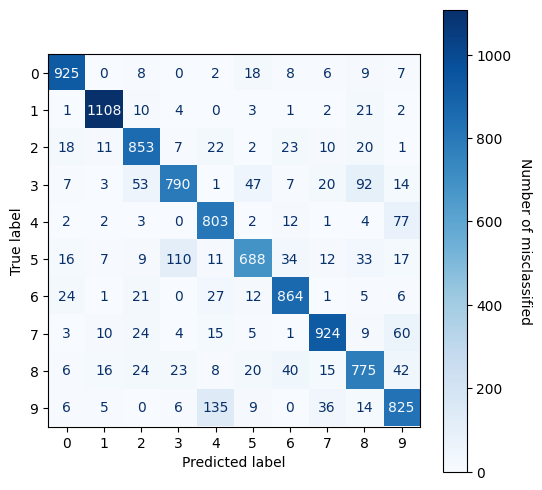

In [ ]:
np.random.seed(329)
layer_output_sizes = [128, 64, 32, output_size]
activation_funcs = [ReLU, sigmoid, sigmoid, softmax]
lmbda = 0.021544
epochs = 100 #Lars 100
train_and_evaluate_best_model(X_trainval, y_trainval, X_test, y_test, layer_output_sizes, activation_funcs, lmbda, epochs)